In [4]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as web  
from scipy.stats import norm 
import matplotlib.pyplot as plt  
%matplotlib inline

In [5]:
Stock = 'AAPL'  
data = pd.DataFrame()
data[Stock] = web.DataReader(Stock, data_source='yahoo', start='2010-1-1')['Adj Close']

In [6]:
log_returns = np.log(1 + data.pct_change())

In [7]:
log_returns.tail()

,AAPL
Date,
2021-03-01,0.052451
2021-03-02,-0.021115
2021-03-03,-0.024761
2021-03-04,-0.015938
2021-03-05,0.010681


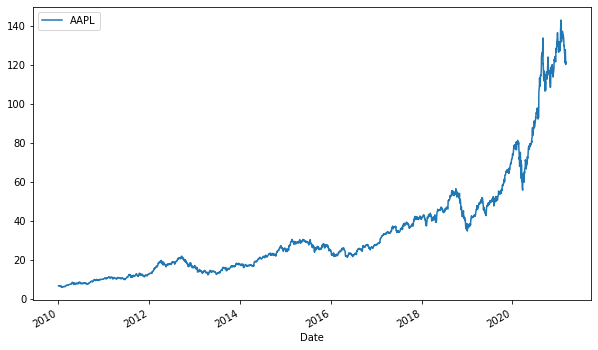

In [8]:
data.plot(figsize=(10, 6));

In [9]:
r = 0.025

In [10]:
stdev = log_returns.std() * 250 ** 0.5
stdev

AAPL    0.283016
dtype: float64

In [11]:
stdev = stdev.values
stdev

array([0.2830163])

In [12]:
T = 1.0 
t_intervals = 250 
delta_t = T / t_intervals  
iterations = 10000  

In [13]:
#lets simulate a 10000 normal distributed sample of S for  250 trading days

<br /><br />
$$
{\LARGE S_t = S_{t-1} \mathbin{\cdot} e^{((r - \frac{1}{2} \cdot stdev^2) \mathbin{\cdot} \delta_t + stdev \mathbin{\cdot} \sqrt{\delta_t} \mathbin{\cdot} Z_t)}  }
$$
<br /><br />

In [14]:
Z = np.random.standard_normal((t_intervals + 1, iterations))  
S = np.zeros_like(Z) 
S0 = data.iloc[-1]  
S[0] = S0 

for t in range(1, t_intervals + 1):
    S[t] = S[t-1] * np.exp((r - 0.5 * stdev ** 2) * delta_t + stdev * delta_t ** 0.5 * Z[t])

In [15]:
S

array([[121.41999817, 121.41999817, 121.41999817, ..., 121.41999817,
        121.41999817, 121.41999817],
       [121.70863526, 117.86747748, 122.86778129, ..., 119.33355638,
        118.5716644 , 122.42227921],
       [123.67087473, 116.53346729, 125.17236454, ..., 119.09925609,
        115.53874307, 121.78654769],
       ...,
       [133.92017472,  97.99548727, 192.21812726, ..., 112.912722  ,
         95.57853952,  90.85569214],
       [134.68613675,  95.73900071, 193.48818154, ..., 112.53654897,
         96.49008893,  92.69266924],
       [136.84118975,  94.33664256, 192.85141384, ..., 111.49344806,
         97.36957273,  94.51996199]])

In [16]:
S.shape

(251, 10000)

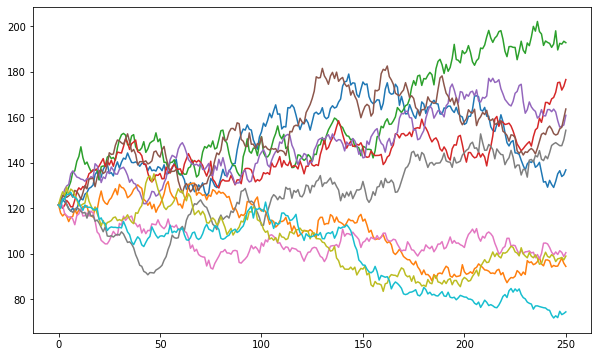

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10]);

******

<br /><br />
$$
{\LARGE S[-1] = S_{T} \\
\LARGE K=110 }
$$
<br /><br />

In [18]:
p = np.maximum(S[-1] - 110, 0)

In [22]:
p.shape

(10000,)

In [20]:
C = np.exp(-r * T) * np.sum(p) / iterations
C  

21.097874272608124